In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR

In [120]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [122]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [123]:
numeric_train_list=['LotFrontage', 'LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','BedroomAbvGr','KitchenAbvGr']
categorical_train_list=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
target_list=['SalePrice']

In [124]:
# Checking who is not in the list
for i in train.columns:
    if i not in (numeric_train_list+categorical_train_list+target_list):
        print(i)

Id


In [125]:
numeric_train=train.loc[:,numeric_train_list]
categorical_train=train[categorical_train_list]
target=train[target_list]

In [126]:
len(numeric_train)

1460

In [127]:
# Check the percentage of missing value in each column
# Drop Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature 
categorical_train.isna().sum()/len(categorical_train)

MSSubClass       0.000000
MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual  

In [128]:
# As there are too many missing values in PoolQC, Fence
categorical_train=categorical_train.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [129]:
categorical_train.isna().sum()/len(categorical_train)

MSSubClass       0.000000
MSZoning         0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
SaleType    

In [130]:
numeric_train.isna().sum()/len(numeric_train)

LotFrontage      0.177397
LotArea          0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
dtype: float64

the percentage of missing GarageYrBlt is exact the same as 'GarageType', GarageFinish', 'GarageQual'...... => probably the house just doesn't have garage...

In [131]:
categorical_train[categorical_train.GarageType.isna()]

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
39,90,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,FuseP,Fa,Typ,NaN,NaN,NaN,NaN,N,WD,AdjLand
48,190,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,N,New,Partial
78,90,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
88,50,C (all),Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,...,SBrkr,Fa,Typ,NaN,NaN,NaN,NaN,N,ConLD,Abnorml
89,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,70,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1407,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1449,180,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,SBrkr,Ex,Typ,NaN,NaN,NaN,NaN,Y,WD,Abnorml
1450,90,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [132]:
categorical_train

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [133]:
# we can classify the missing one into one category
categorical_train.loc[categorical_train.GarageType.isna(),['GarageType','GarageFinish','GarageCond','GarageQual']]='no_garage'

In [134]:
# fill the missing value with the minimum value
numeric_train.loc[numeric_train.GarageYrBlt.isna(),'GarageYrBlt']=numeric_train.GarageYrBlt.min()

In [135]:
# let's try drop 'LetFrontage'
numeric_train=numeric_train.drop('LotFrontage',axis=1)

In [136]:
numeric_train.loc[numeric_train.MasVnrArea.isna(),:]=0

In [137]:
categorical_train.loc[categorical_train.Electrical.isna(),:]
categorical_train['Electrical']=categorical_train['Electrical'].ffill()

In [138]:
categorical_train.loc[:,[name for name in categorical_train.columns if 'Bsmt' in name]]=categorical_train.loc[:,[name for name in categorical_train.columns if 'Bsmt' in name]].fillna('No_Bsmt')

#### Exploratory Data Analysis (EDA) for categorical data

<Axes: xlabel='SalePrice', ylabel='Count'>

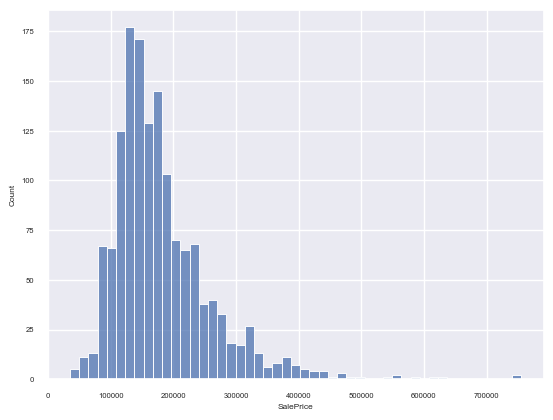

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=target, x="SalePrice")

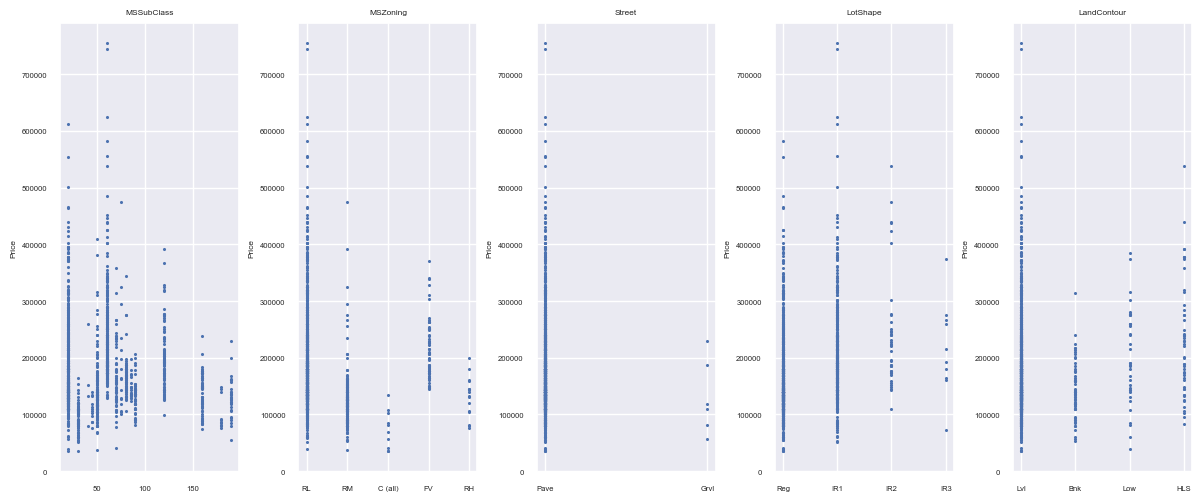

In [141]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[0:5]:
    plt.subplot(1,5,k)
    plt.scatter(categorical_train.loc[:,item],target,s=1.5)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

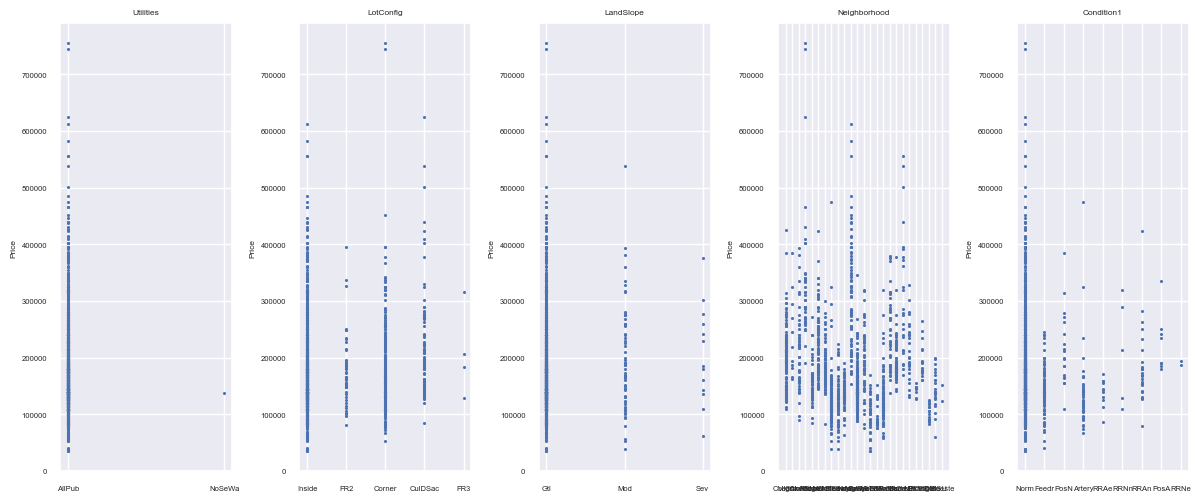

In [140]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[5:10]:
    plt.subplot(1,5,k)
    plt.scatter(categorical_train.loc[:,item],target,s=1.5)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

In [80]:
categorical_train.columns[10:15]

Index(['Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond'], dtype='object')

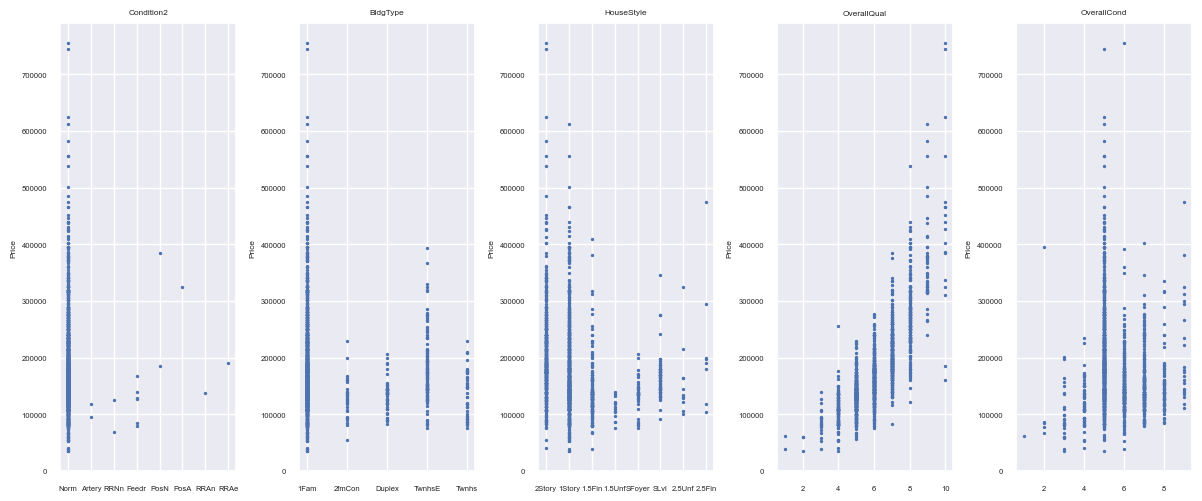

In [81]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[10:15]:
    plt.subplot(1,5,k)
    plt.scatter(categorical_train.loc[:,item],target,s=2)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

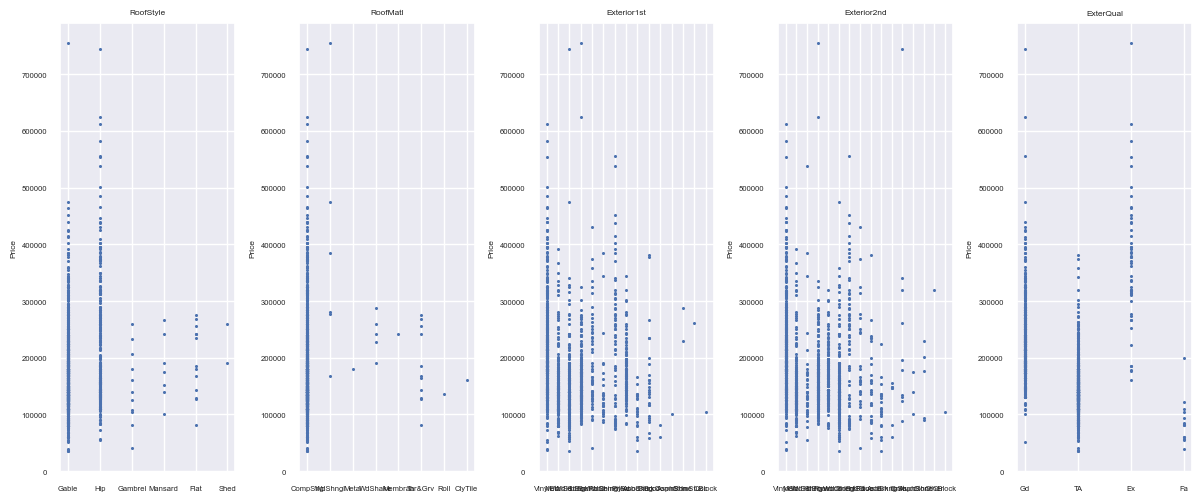

In [82]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[15:20]:
    plt.subplot(1,5,k)
    plt.scatter(categorical_train.loc[:,item],target,s=1.5)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

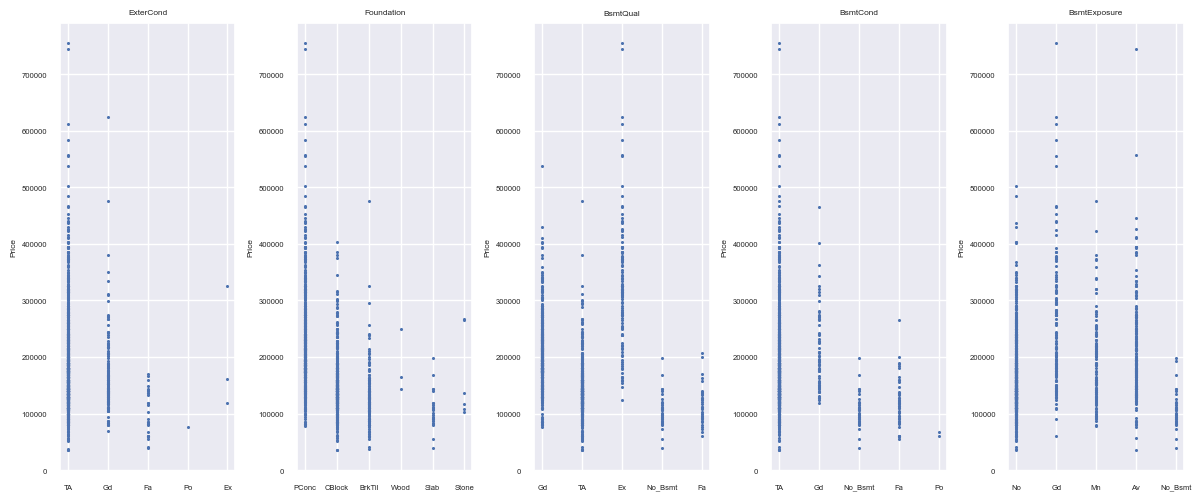

In [83]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[20:25]:
    plt.subplot(1,5,k)
    plt.scatter(categorical_train.loc[:,item],target,s=1.5)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

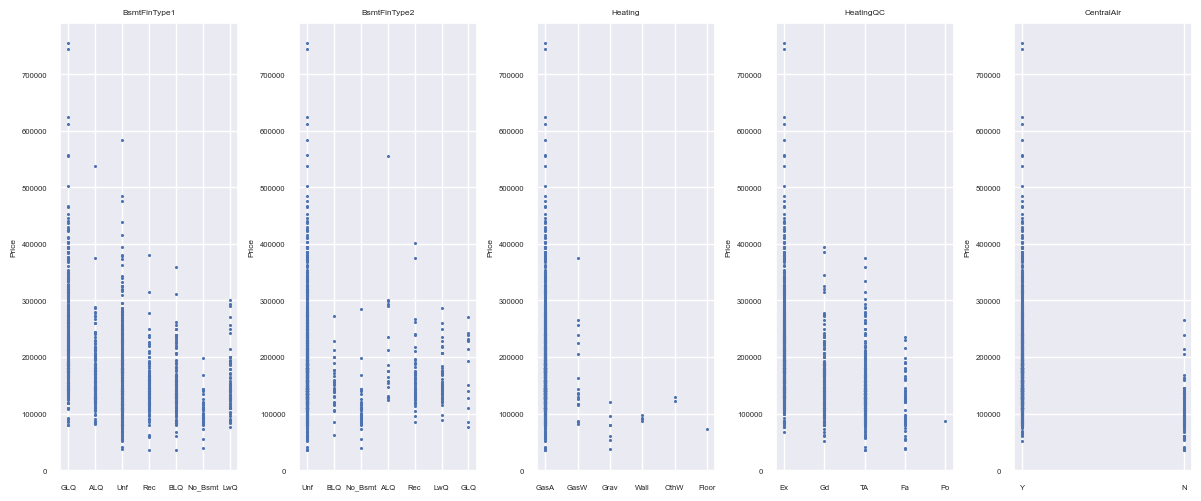

In [84]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[25:30]:
    plt.subplot(1,5,k)
    plt.scatter(categorical_train.loc[:,item],target,s=1.5)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

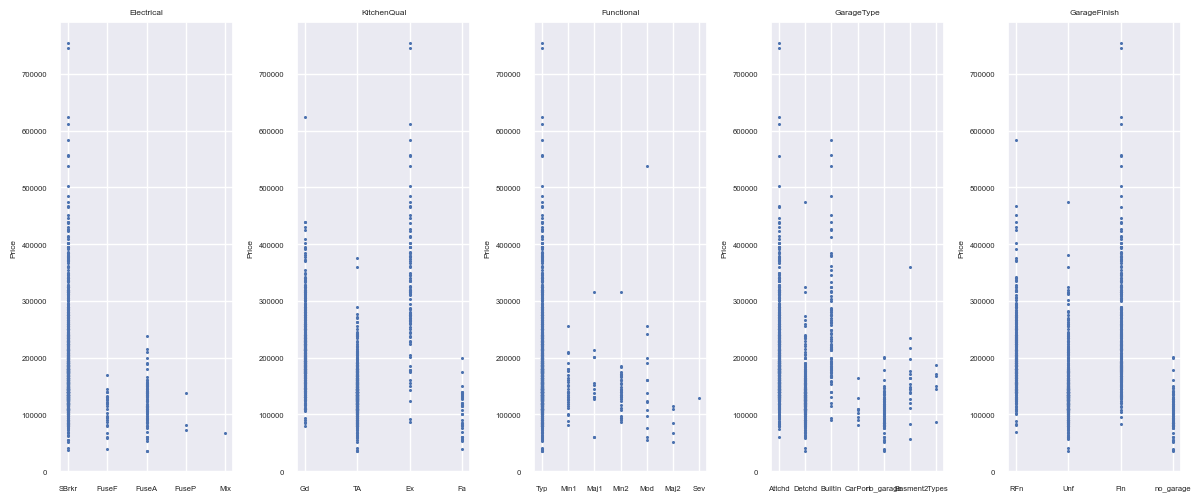

In [85]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[30:35]:
    plt.subplot(1,5,k)
    plt.scatter(categorical_train.loc[:,item],target,s=1.5)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

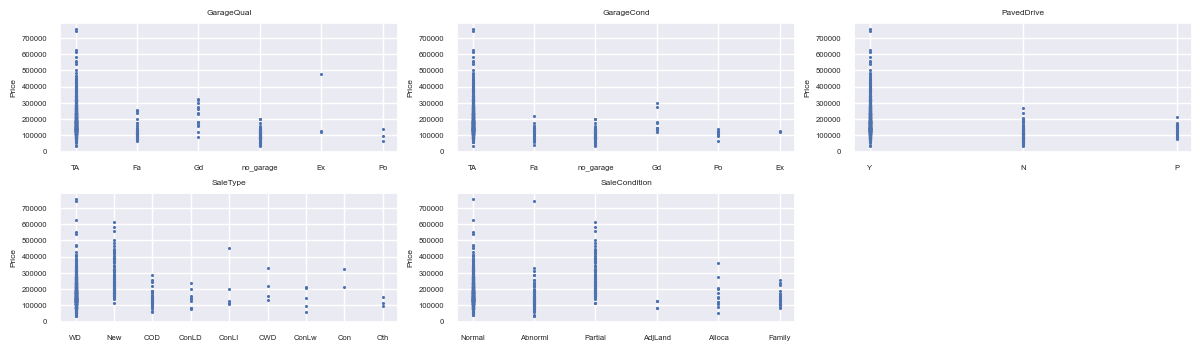

In [86]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[35:41]:
    plt.subplot(3,3,k)
    plt.scatter(categorical_train.loc[:,item],target,s=1.5)
    plt.ylabel('Price')
    plt.title(item)
    k+=1
plt.tight_layout()

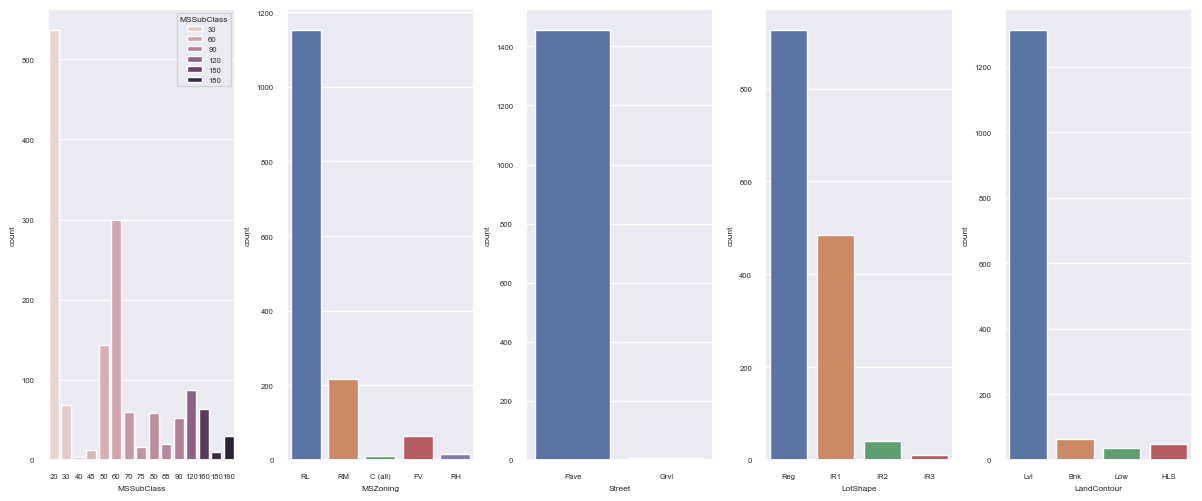

In [87]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[0:5]:
    plt.subplot(1,5,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

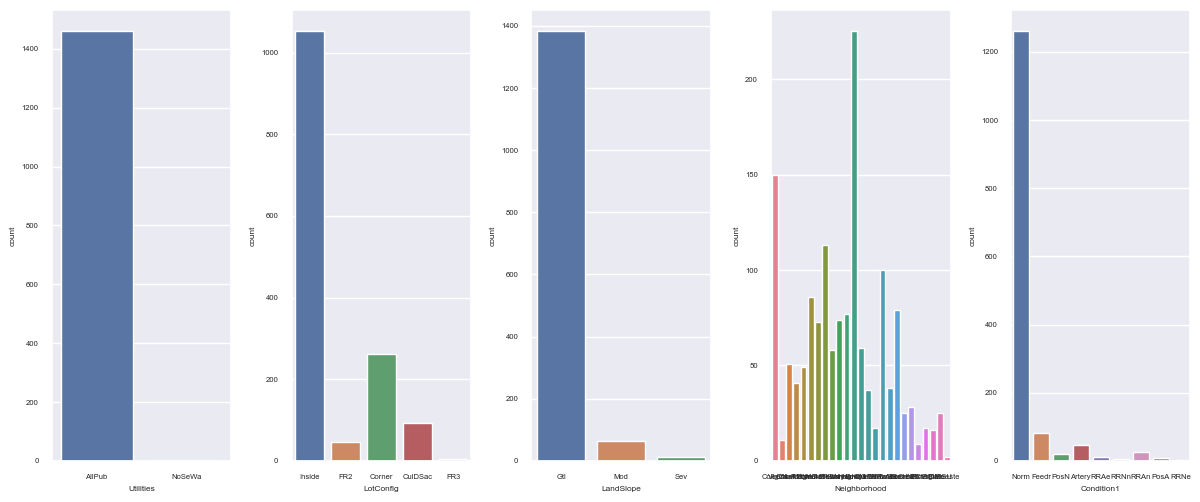

In [88]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[5:10]:
    plt.subplot(1,5,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

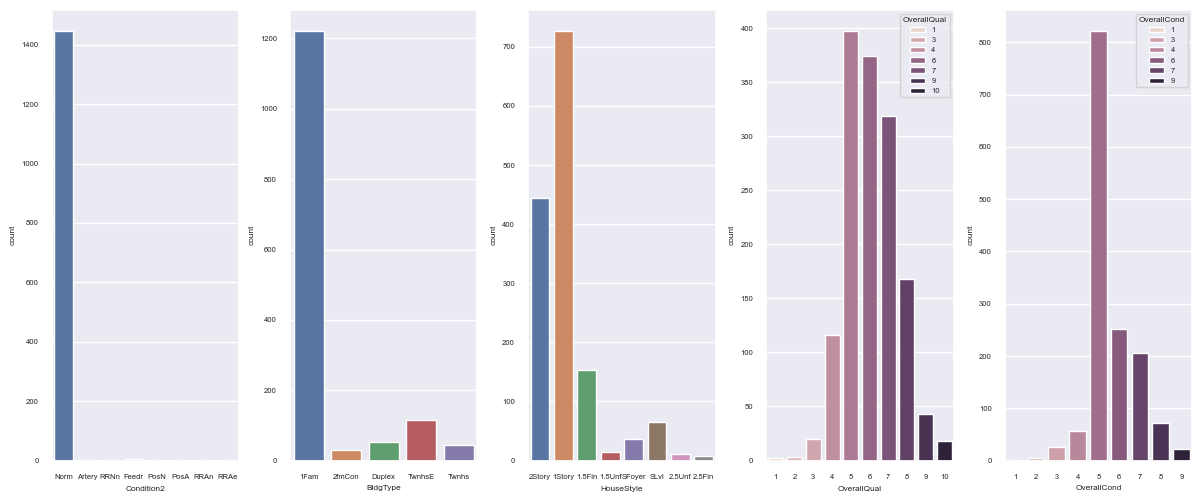

In [89]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[10:15]:
    plt.subplot(1,5,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

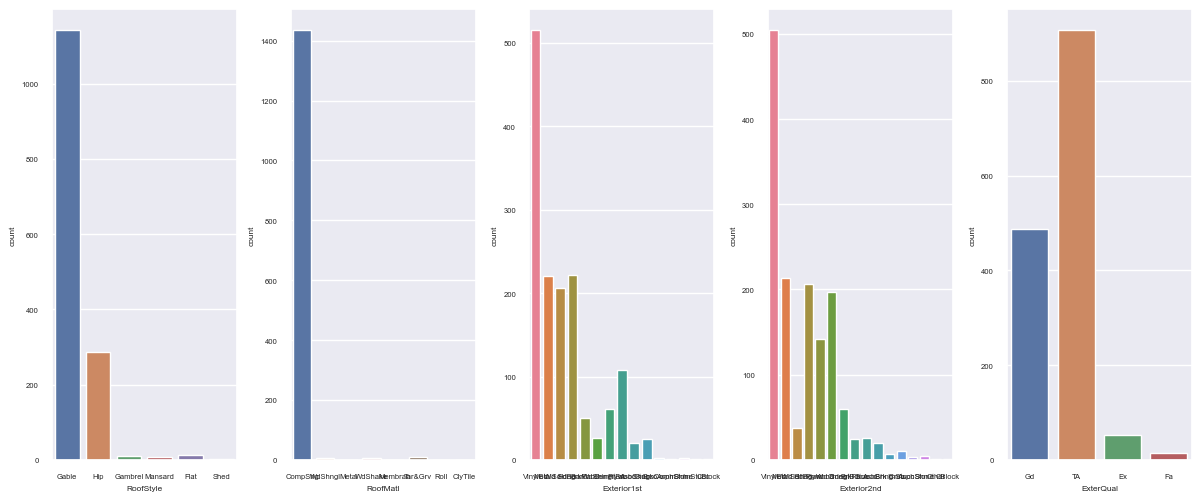

In [90]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[15:20]:
    plt.subplot(1,5,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

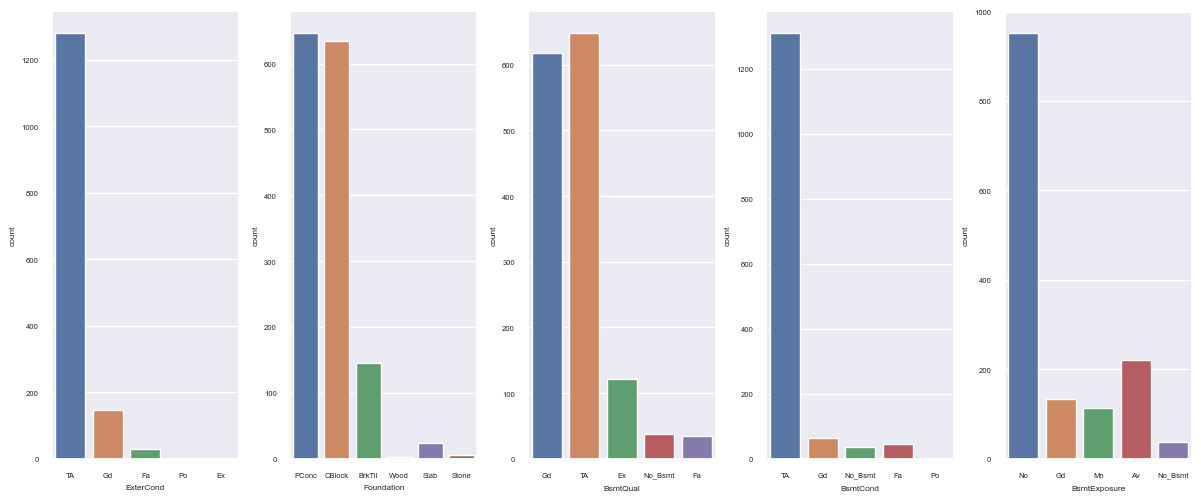

In [91]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[20:25]:
    plt.subplot(1,5,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

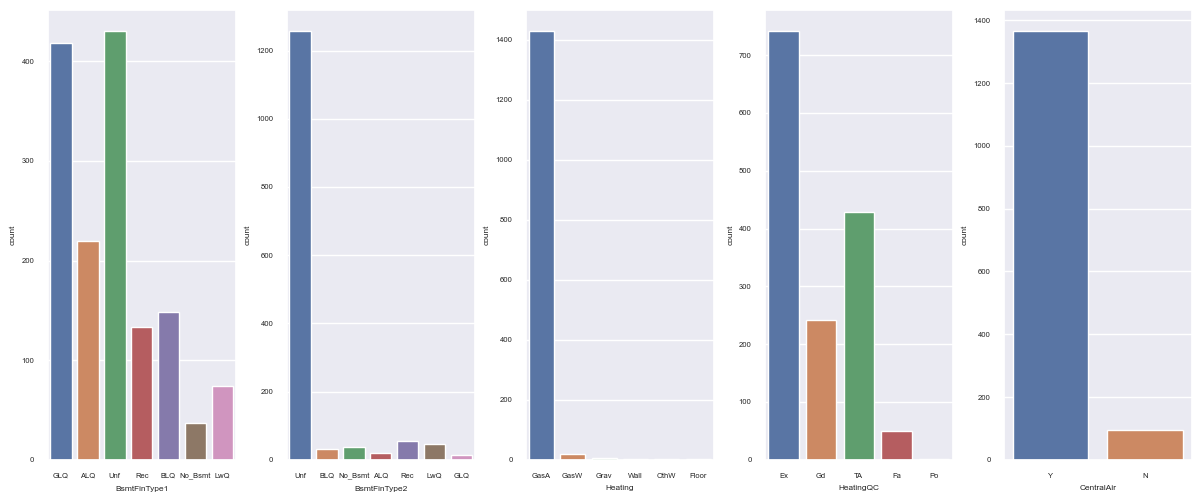

In [92]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[25:30]:
    plt.subplot(1,5,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

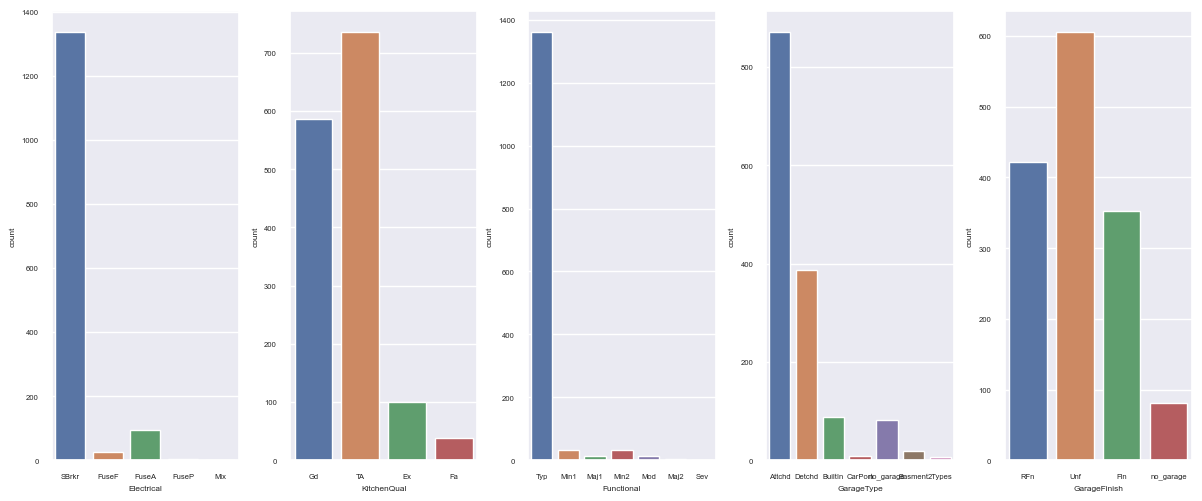

In [93]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[30:35]:
    plt.subplot(1,5,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

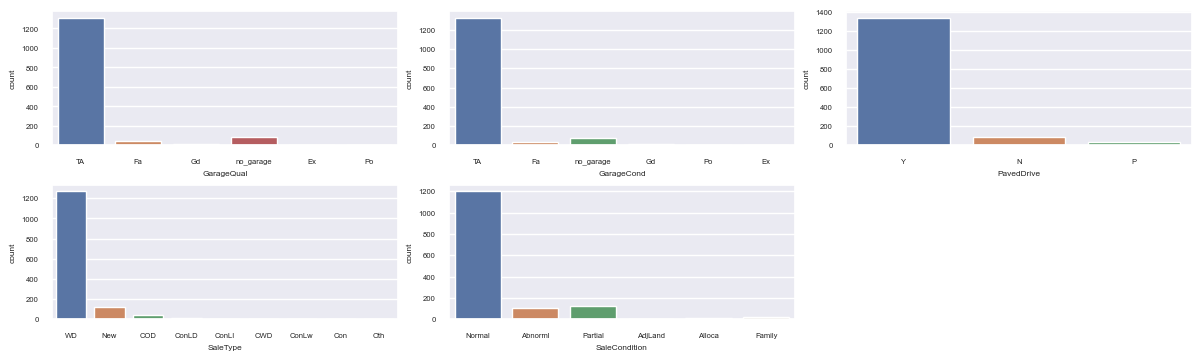

In [94]:
k=1
plt.figure(figsize=(12,5))
for item in categorical_train.columns[35:41]:
    plt.subplot(3,3,k)
    sns.countplot(categorical_train,x=item,hue=item)
    sns.set(font_scale=0.5)
    k+=1
plt.tight_layout()

### Exploratory Data Analysis for numerical data

In [95]:
num_df=pd.concat([numeric_train,target],axis=1)

<Axes: >

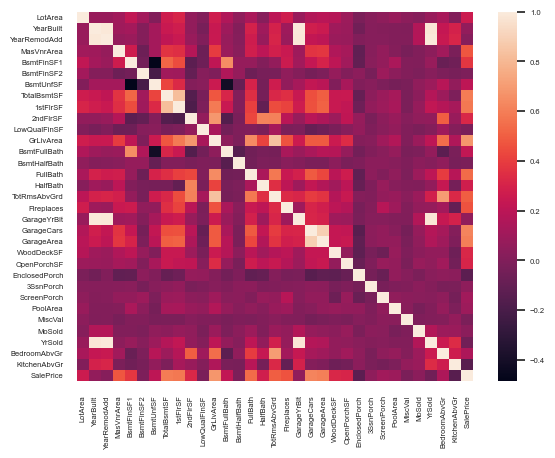

In [96]:
sns.heatmap(num_df.corr())

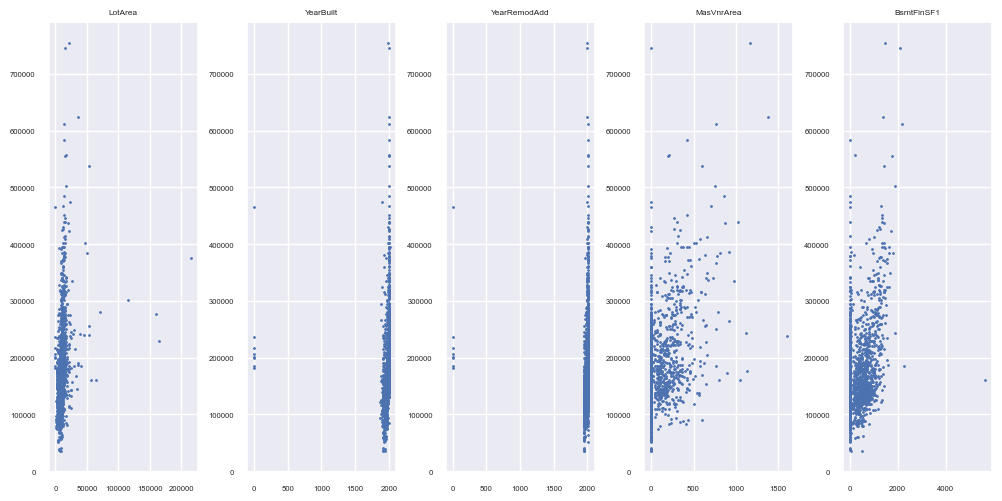

In [97]:
plt.figure(figsize=(10,5))
k=1
for item in numeric_train.columns[0:5]:
    plt.subplot(1,5,k)
    plt.scatter(x=num_df.loc[:,item],y=num_df.SalePrice,s=1)
    plt.title(item)
    k+=1
plt.tight_layout()

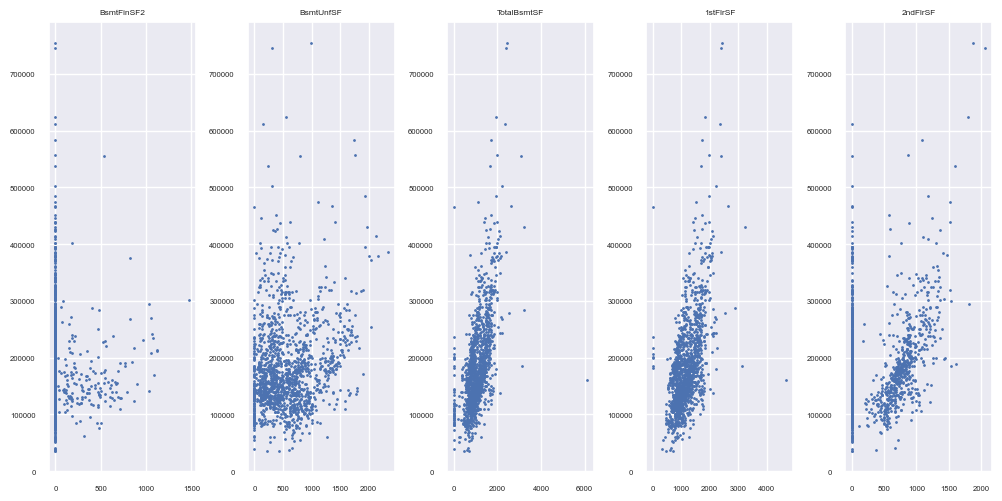

In [98]:
plt.figure(figsize=(10,5))
k=1
for item in numeric_train.columns[5:10]:
    plt.subplot(1,5,k)
    plt.scatter(x=num_df.loc[:,item],y=num_df.SalePrice,s=1)
    plt.title(item)
    k+=1
plt.tight_layout()

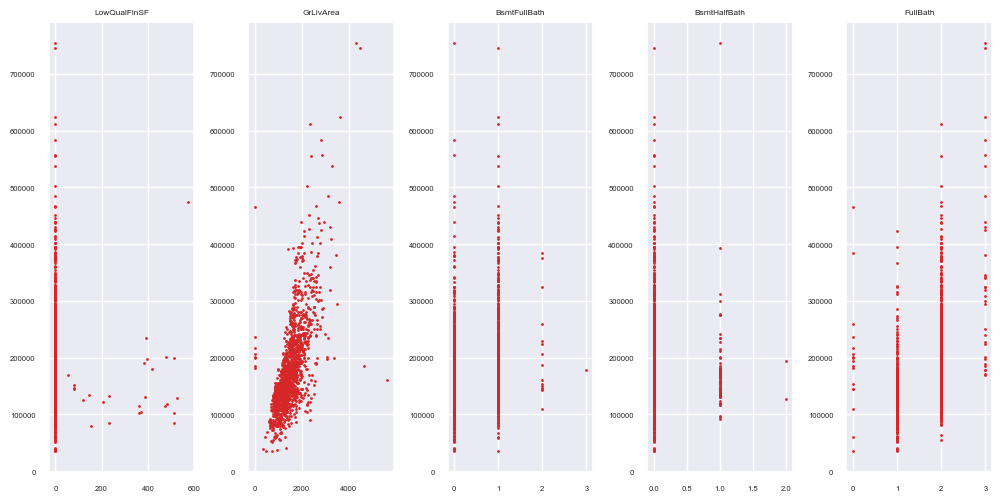

In [99]:
plt.figure(figsize=(10,5))
k=1
for item in numeric_train.columns[10:15]:
    plt.subplot(1,5,k)
    plt.scatter(x=num_df.loc[:,item],y=num_df.SalePrice,s=1,c='#d62728')
    plt.title(item)
    k+=1
plt.tight_layout()

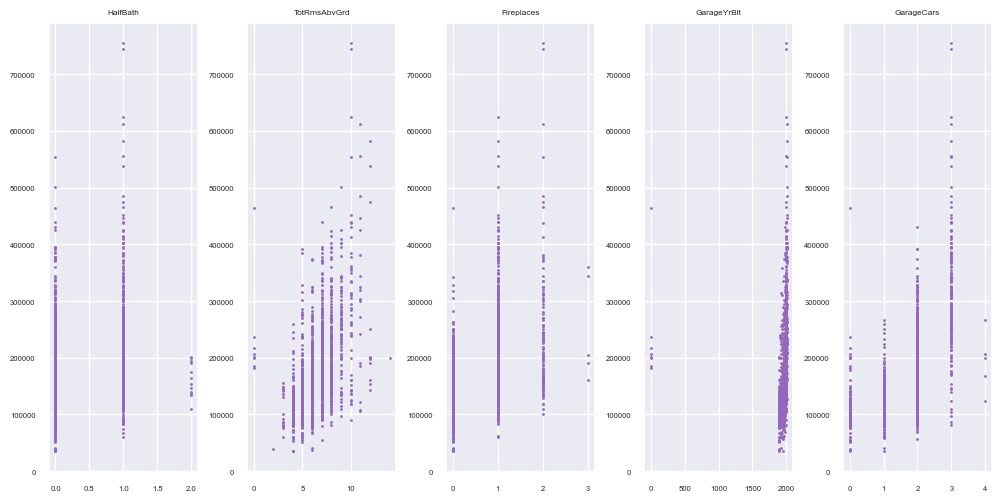

In [100]:
plt.figure(figsize=(10,5))
k=1
for item in numeric_train.columns[15:20]:
    plt.subplot(1,5,k)
    plt.scatter(x=num_df.loc[:,item],y=num_df.SalePrice,s=1,c='#9467bd')
    plt.title(item)
    k+=1
plt.tight_layout()

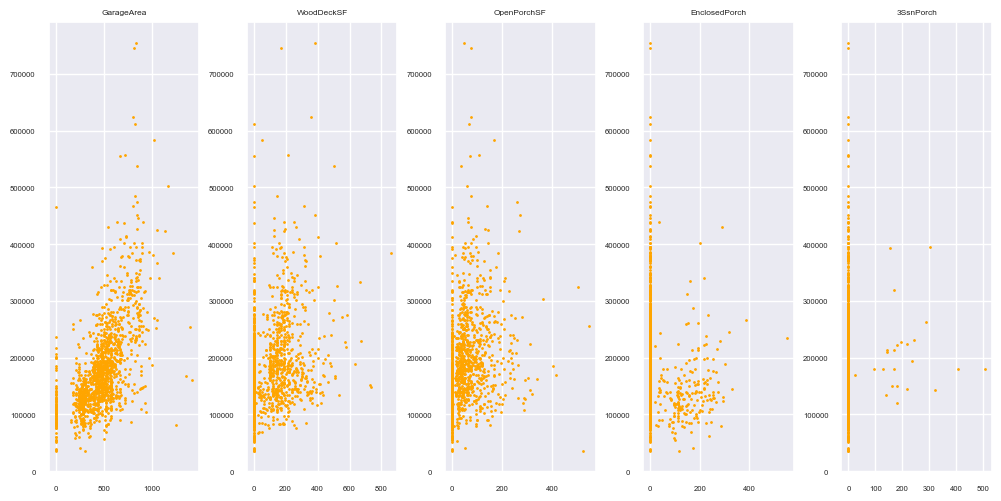

In [101]:
plt.figure(figsize=(10,5))
k=1
for item in numeric_train.columns[20:25]:
    plt.subplot(1,5,k)
    plt.scatter(x=num_df.loc[:,item],y=num_df.SalePrice,s=1,c='orange')
    plt.title(item)
    k+=1
plt.tight_layout()

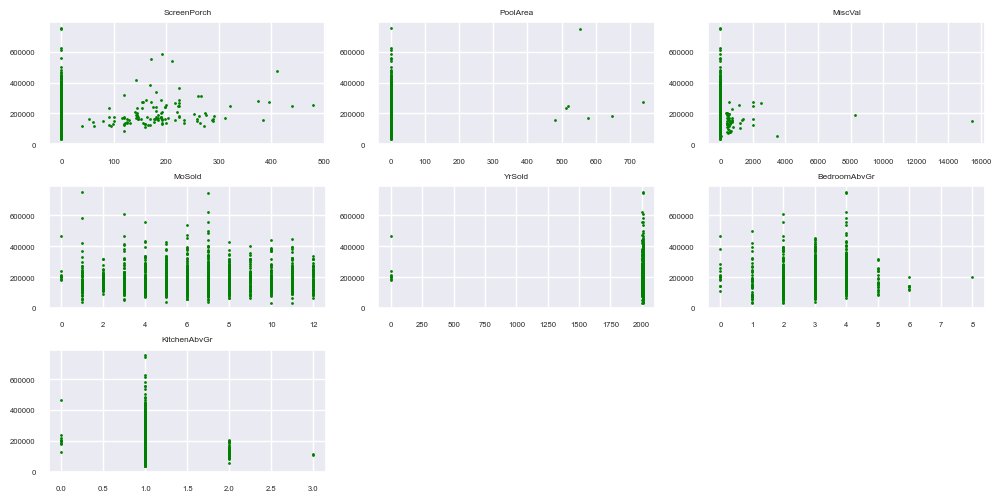

In [102]:
plt.figure(figsize=(10,5))
k=1
for item in numeric_train.columns[25:33]:
    plt.subplot(3,3,k)
    plt.scatter(x=num_df.loc[:,item],y=num_df.SalePrice,s=1,c='green')
    plt.title(item)
    k+=1
plt.tight_layout()

In [103]:
# try to make all the categorical data 
categorical_train=categorical_train.astype('category')

In [104]:
categorical_train.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [105]:
# one-hot encode the categorical data
categorical_train=categorical_train.drop(['MSSubClass','Utilities','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','Heating','Electrical','GarageQual'],axis=1)
cat_df_onehot=pd.get_dummies(categorical_train,drop_first=True,dtype='float')

In [106]:
len(cat_df_onehot.columns)

154

In [107]:
cat_df_onehot.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=154)

In [108]:
df=pd.concat([numeric_train,cat_df_onehot,target],axis=1)

In [109]:
X=df.drop('SalePrice',axis=1).values
y=df.SalePrice.values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
# scaler = MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [112]:
xgbr_model=xgb.XGBRegressor()
xgbr_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [113]:
xgbr_model.score(X_train,y_train)

0.9998285543077002

In [114]:
xgbr_model.score(X_test,y_test)

0.8768867093566551

In [115]:
y_pred=xgbr_model.predict(X_test)

In [286]:
r2_score(y_test,y_pred)

0.8768867093566551

In [290]:
def predict_result(filename,model):
    test_data=pd.read_csv('test.csv')
    numeric_test_list=['LotFrontage', 'LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','BedroomAbvGr','KitchenAbvGr']
    categorical_test_list=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
    numeric_test=test_data.loc[:,numeric_test_list]
    categorical_test=test_data.loc[:,categorical_test_list]
    categorical_test=categorical_test.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)
    categorical_test.loc[categorical_test.GarageType.isna(),['GarageType','GarageFinish','GarageCond','GarageQual']]='no_garage'
    numeric_test.loc[numeric_test.GarageYrBlt.isna(),'GarageYrBlt']=numeric_test.GarageYrBlt.min()
    numeric_test=numeric_test.drop('LotFrontage',axis=1)
    numeric_test.loc[numeric_test.MasVnrArea.isna(),:]=0
    categorical_test['Electrical']=categorical_test['Electrical'].ffill()
    categorical_test.loc[:,[name for name in categorical_test.columns if 'Bsmt' in name]]=categorical_test.loc[:,[name for name in categorical_test.columns if 'Bsmt' in name]].fillna('No_Bsmt')
    categorical_test=categorical_test.drop(['MSSubClass','Utilities','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','Heating','Electrical','GarageQual'],axis=1)
    categorical_test=categorical_test.astype('category')
    cat_mis=categorical_test.columns[categorical_test.isna().sum()!=0]
    for item in cat_mis:
        categorical_test[item]=categorical_test[item].ffill()
    cat_df_onehot_test=pd.get_dummies(categorical_test,drop_first=True,dtype='float')
    X_test=pd.concat([numeric_test,cat_df_onehot_test],axis=1).values
    result=pd.Series(xgbr_model.predict(X_test))
    df=pd.concat([test_data.Id,result],axis=1)
    df.columns=['Id','SalePrice']
    return df

In [291]:
result=predict_result('test.csv',xgbr_model)

In [293]:
result.to_csv('result.csv',index=False)